In [4]:
!pip install nltk

# **1. A python program to find all unigrams, bigrams and trigrams present in the given corpus.**

In [5]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.util import ngrams
samplText='this is a very good book to study'
for i in range(1,4):
    NGRAMS=ngrams(sequence=nltk.word_tokenize(samplText), n=i)
    for grams in NGRAMS:
        print(grams)

('this',)
('is',)
('a',)
('very',)
('good',)
('book',)
('to',)
('study',)
('this', 'is')
('is', 'a')
('a', 'very')
('very', 'good')
('good', 'book')
('book', 'to')
('to', 'study')
('this', 'is', 'a')
('is', 'a', 'very')
('a', 'very', 'good')
('very', 'good', 'book')
('good', 'book', 'to')
('book', 'to', 'study')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


#**2. A python program to find the probability of the given statement “This is my cat” by taking the an exmple corpus into consideration. 'This is a dog’, 'This is a cat', 'I love my cat', 'This is my name’**

In [6]:
def readData():
    data = ['This is a dog', 'This is a cat', 'I love my cat', 'This is my name']
    dat = []
    for sentence in data:
        for word in sentence.split():
            dat.append(word)
    print(dat)
    return dat

def createBigram(data):
    listOfBigrams = []
    bigramCounts = {}
    unigramCounts = {}

    for i in range(len(data) - 1):
        if data[i + 1].islower():
            bigram = (data[i], data[i + 1])
            listOfBigrams.append(bigram)
            if bigram in bigramCounts:
                bigramCounts[bigram] += 1
            else:
                bigramCounts[bigram] = 1
        if data[i] in unigramCounts:
            unigramCounts[data[i]] += 1
        else:
            unigramCounts[data[i]] = 1

    return listOfBigrams, unigramCounts, bigramCounts

def calcBigramProb(listOfBigrams, unigramCounts, bigramCounts):
    listOfProb = {}
    for bigram in listOfBigrams:
        word1 = bigram[0]
        word2 = bigram[1]
        listOfProb[bigram] = bigramCounts.get(bigram, 0) / unigramCounts.get(word1, 1)
    return listOfProb

if __name__ == '__main__':
    data = readData()
    listOfBigrams, unigramCounts, bigramCounts = createBigram(data)

    print("\nAll the possible Bigrams are:")
    print(listOfBigrams)

    print("\nBigrams along with their frequency:")
    print(bigramCounts)

    print("\nUnigrams along with their frequency:")
    print(unigramCounts)

    bigramProb = calcBigramProb(listOfBigrams, unigramCounts, bigramCounts)

    print("\nBigrams along with their probability:")
    print(bigramProb)

    inputList = "This is my cat"
    splt = inputList.split()
    bilist = []
    outputProb1 = 1

    for i in range(len(splt) - 1):
        bilist.append((splt[i], splt[i + 1]))

    print("\nThe bigrams in the given sentence are:")
    print(bilist)

    for bigram in bilist:
        if bigram in bigramProb:
            outputProb1 *= bigramProb[bigram]
        else:
            outputProb1 *= 0

    print(f'\nProbability of the sentence "This is my cat" = {outputProb1}')


['This', 'is', 'a', 'dog', 'This', 'is', 'a', 'cat', 'I', 'love', 'my', 'cat', 'This', 'is', 'my', 'name']

All the possible Bigrams are:
[('This', 'is'), ('is', 'a'), ('a', 'dog'), ('This', 'is'), ('is', 'a'), ('a', 'cat'), ('I', 'love'), ('love', 'my'), ('my', 'cat'), ('This', 'is'), ('is', 'my'), ('my', 'name')]

Bigrams along with their frequency:
{('This', 'is'): 3, ('is', 'a'): 2, ('a', 'dog'): 1, ('a', 'cat'): 1, ('I', 'love'): 1, ('love', 'my'): 1, ('my', 'cat'): 1, ('is', 'my'): 1, ('my', 'name'): 1}

Unigrams along with their frequency:
{'This': 3, 'is': 3, 'a': 2, 'dog': 1, 'cat': 2, 'I': 1, 'love': 1, 'my': 2}

Bigrams along with their probability:
{('This', 'is'): 1.0, ('is', 'a'): 0.6666666666666666, ('a', 'dog'): 0.5, ('a', 'cat'): 0.5, ('I', 'love'): 1.0, ('love', 'my'): 1.0, ('my', 'cat'): 0.5, ('is', 'my'): 0.3333333333333333, ('my', 'name'): 0.5}

The bigrams in the given sentence are:
[('This', 'is'), ('is', 'my'), ('my', 'cat')]

Probability of the sentence "This i

# **3. Python code to detect Fake News using NLP.**

In [14]:
#how to upload a large datset from drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
# Replace with actual path to your dataset in Google Drive
#datset link:https://www.kaggle.com/c/fake-news/code
#downloaded train.csv and renamed it as fakenews.csv
dataset_path = '/content/drive/MyDrive/fakenews.csv'
try:
    dataset = pd.read_csv(dataset_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: Dataset not found at {dataset_path}. Please check the path.")

Dataset loaded successfully.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0.9024496937882764

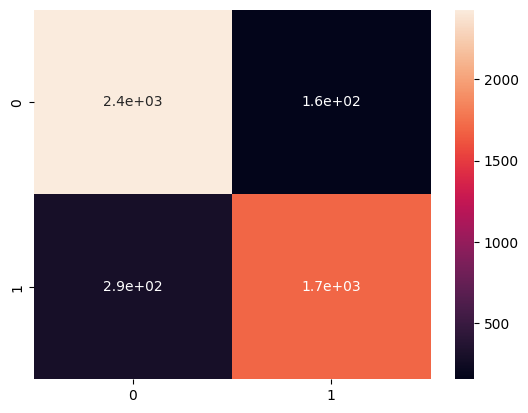

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
dataset=pd.read_csv(dataset_path)
dataset.head()
#[id,title,author,text,label] 0 real 1 fake
dataset.shape

#checking empty values
dataset.isna().sum()
dataset.dropna(axis=0,inplace=True)
dataset.shape

dataset.head()
dataset.reset_index(inplace=True)
dataset

#balanced data or imbalanced data
sns.countplot(dataset['label'])
#preprocessing special characters
data=dataset['title'][0]
import re
data=re.sub('[^a-zA-Z]',' ',data)

#changing to lower case
data=data.lower()
data

#split the text
list=data.split()
list

#remove the stopwords from text if any
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
review=[ps.stem(word) for word in list if not word in stopwords.words('english')]
review
' '.join(review)

corpus=[]
for i in range(0,len(dataset)):
    review=re.sub('[^a-zA-Z]',' ',dataset['title'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    corpus.append(' '.join(review))
corpus[0]
corpus

#bag of words model [text vector]

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(corpus).toarray()#space matrix
x.shape #(18285,14913)
x[0]
y=dataset['label']
y.shape #(18285, )

#training set test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
x_train.shape
x_test.shape
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
y_pred
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
cm
accuracy_score(y_test,y_pred)

# **4.Choose any corpus available on the internet freely. For the corpus, for each document, count how many  times each stop word occurs and find out which are the most frequently occurring stop words. Further,  calculate the term frequency and inverse document frequency as  The motivation behind this is basically to find out how important a document is to a given query. For e.g.: If the query is say: “The brown crow”. “The” is less important. “Brown” and “crow” are relatively more important. Since “the” is a more common word, its tf will be high. Hence we multiply it by idf, by knowing how common it is to reduce its weight.**

In [7]:
# Import necessary libraries
import nltk
from nltk.corpus import gutenberg
from nltk.corpus import stopwords
from collections import Counter
import pandas as pd
import numpy as np

# Download necessary NLTK data
nltk.download('gutenberg')
nltk.download('stopwords')

# Define stop words
stop_words = set(stopwords.words('english'))

# Load the Gutenberg Corpus from NLTK
corpus = gutenberg.fileids()

# Initialize a dictionary to store stop word counts per document
stop_word_counts = {}

# Calculate stop word occurrences in each document
for fileid in corpus:
    words = gutenberg.words(fileid)
    stop_word_counter = Counter(word.lower() for word in words if word.lower() in stop_words)
    stop_word_counts[fileid] = stop_word_counter

# Display stop word counts
print("Stop Word Counts for Each Document:")
for fileid, count in stop_word_counts.items():
    print(f"\nDocument: {fileid}")
    print(count.most_common(10))  # Show top 10 most common stop words

# Combine all words for TF-IDF calculation (excluding stop words)
documents = []
for fileid in corpus:
    words = [word.lower() for word in gutenberg.words(fileid) if word.isalpha() and word.lower() not in stop_words]
    documents.append(words)

# Flatten documents for term frequency calculation
flat_documents = [word for doc in documents for word in doc]

# Calculate term frequency (TF)
tf = Counter(flat_documents)
tf = {word: freq / len(flat_documents) for word, freq in tf.items()}

# Calculate document frequency (DF)
df = Counter()
for doc in documents:
    unique_terms = set(doc)
    for term in unique_terms:
        df[term] += 1

# Calculate inverse document frequency (IDF)
total_docs = len(documents)
idf = {term: np.log(total_docs / df[term]) for term in df}

# Calculate TF-IDF
tf_idf = {term: tf[term] * idf[term] for term in tf}

# Display TF-IDF scores for top 10 words with highest scores
tf_idf_sorted = sorted(tf_idf.items(), key=lambda x: x[1], reverse=True)
print("\nTop 10 Words by TF-IDF Score:")
for term, score in tf_idf_sorted[:10]:
    print(f"{term}: {score}")


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Stop Word Counts for Each Document:

Document: austen-emma.txt
[('to', 5239), ('the', 5201), ('and', 4896), ('of', 4291), ('i', 3178), ('a', 3129), ('it', 2528), ('her', 2469), ('was', 2398), ('she', 2340)]

Document: austen-persuasion.txt
[('the', 3329), ('to', 2808), ('and', 2801), ('of', 2570), ('a', 1595), ('in', 1389), ('was', 1337), ('her', 1204), ('had', 1186), ('she', 1146)]

Document: austen-sense.txt
[('to', 4116), ('the', 4105), ('of', 3572), ('and', 3491), ('her', 2551), ('a', 2092), ('i', 2004), ('in', 1979), ('was', 1861), ('it', 1757)]

Document: bible-kjv.txt
[('the', 64023), ('and', 51696), ('of', 34670), ('to', 13580), ('that', 12912), ('in', 12667), ('he', 10419), ('for', 8971), ('i', 8854), ('his', 8473)]

Document: blake-poems.txt
[('the', 439), ('and', 348), ('of', 146), ('in', 141), ('i', 130), ('a', 128), ('to', 111), ('my', 83), ('with', 66), ('his', 57)]

Document: bryant-stories.txt
[('the', 3451), ('and', 2098), ('to', 1180), ('a', 1036), ('he', 1017), ('of'

# **5. Python code to perform sentiment analysis using NLP.**

In [8]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
Sid=SentimentIntensityAnalyzer()
a='This movie is great to watch'
Sid.polarity_scores(a)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'compound': 0.6249}

# **6. Python code to develop Spam Filter using NLP.**

In [9]:
from google.colab import files
uploaded=files.upload()
# dataset link: https://www.kaggle.com/datasets/tmehul/spamcsv

Saving spam.csv to spam.csv


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report

#load the dataset
df=pd.read_csv('spam.csv',encoding='latin-1')
#select relevant columns
df=df[['v1','v2']]
df.columns=['label','message']

#encode labels :spam as 1 and not spam as 0
df['label']=df['label'].map({'spam':1,'ham':0})
#split the dataset into training and test sets
x_train,x_test,y_train,y_test=train_test_split(df['message'],df['label'],test_size=0.2,random_state=42)
#vectorize the text data
vectorizer=CountVectorizer()
x_train_vec=vectorizer.fit_transform(x_train)
x_test_vec=vectorizer.transform(x_test)
#train the model
model=MultinomialNB()
model.fit(x_train_vec,y_train)
#make predictions on the test set
y_pred=model.predict(x_test_vec)
#evaluate the model
accuracy=accuracy_score(y_test,y_pred)
print('accuracy:',accuracy)
report=classification_report(y_test,y_pred)
print('classification report:\n',report)

accuracy: 0.9838565022421525
classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

